-----
<div> <center> ESPACIO PARA BANNER DE LA MAESTRIA </center> </div>   

-----

# Clustering: K-medoids. Fundamentos Teóricos.

El problema que busca solucionar k-medoides es bastante similar al de k-medias. Ambos algoritmos son particionales e intentan minimizar la distancia entre los puntos etiquetados para estar en un grupo y un punto designado como el centro de ese grupo. 

Por su lado, K-medias es apropiado cuando usamos como medida de disimilaridad el cuadrado de la distancia euclideana. Sin embargo, esto nos obliga a solo utilizar variables cuantitativas en nuestro análisis. Además, como usamos el cuadrado de la distancia como métrica, esto hace que sean las distancias más largas las más influyentes en nuestro proceso de segmentación. Por esto último, este algoritmo no es robusto a valores atípicos.

K-Medoides puede solucionar las deventajas de K-medias dado que puede hacer uso de medidas de disimilitud arbitrarias y además minimiza una suma de disimilitudes por pares (en lugar de una suma de distancias euclidianas al cuadrado) por lo que es robusto a valores atípicos. No obstante, estas bondades se dan a expensas de un mayor costo computacional.

El algoritmo que resuelve K-Medoids también conocido como PAM se presenta a continuación:
1. Para una asignación de conglomerado dada $C$, encuentre la observación central $i^*_k$ en el conglomerado minimizando la distancia total a otros puntos en ese conglomerado:
$$i^*_k = \argmin_{\{i: C(i) = k \}} \sum_{C(i') = k} D(x_i, x_i')$$

Luego $m_k = x_{i^*_k}$ para $k = 1, \dots, K$ son los centros estimados de cada cluster.

2. Dado un conjunto actual de centros de conglomerados $\{m_1,. . . , m_K\}$, minimice el error total asignando cada observación al centro del conglomerado más cercano:
$$C(i) = \argmin_{\{1 \leq k \leq K \}} D(x_i, m_k)$$

3. Itere los pasos 1 y 2 hasta que la asignación no cambie.

Note que, para K-medias, el único momento donde usamos la distancia Euclideana es en el paso de encontrar el centroide más cercano para cada observación. Por ende, el algoritmo de K-medoides es una generalización de K-medias en donde en el paso de minimización se deja abierta la posibilidad de usar cualquier medida de disimilaridad entre pares de observaciones. Adicionalmente, en vez de usar la media de las observaciones como centroide, K-medoides escoge la observación más central de cada segmento a partir del paso 1 del algoritmo descrito anteriormente.

En el siguiente ejemplo se puede ilustrar graficamente las diferencias entre cómo escogen los centroides cada algoritmo. A la izquierda se ve como K-Medias escogería el centroide del segmento y a la derecha como lo haría K-medoides. Note que para el primer caso, el punto central no es una observación del segmento y este centro se ve altmanete influenciado por un valor extremo. Para el segundo caso, la solución parece más acorde, sin embargo, para llegar a ella el proceso fue computacionalmente más demandante.

<center>
<img src = "data/media_vs_medoide.png" alt="centroides">
</center>

A continuación vamos a hacer un análisis de segmentación usando K-medoides. Partimos de una matriz de disimilitud entre países tomada de Kaufman y Rousseeuw (1990) en donde estudiantes de Ciencia Política calificaron las distancias ideologicas entre países.

In [79]:
import pandas as pd
df = pd.read_excel("data/dissimilarity_matrix.xlsx", index_col = 0)
df

,BEL,BRA,CHI,CUB,EGY,FRA,IND,ISR,USA,USS,YUG
BRA,558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHI,700,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUB,708,700.0,383.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EGY,483,508.0,817.0,583.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FRA,217,575.0,667.0,692.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN
IND,642,500.0,558.0,600.0,467.0,642.0,NaN,NaN,NaN,NaN,NaN
ISR,342,550.0,642.0,642.0,500.0,392.0,617.0,NaN,NaN,NaN,NaN
USA,250,492.0,625.0,733.0,450.0,225.0,633.0,275.0,NaN,NaN,NaN
USS,608,667.0,425.0,267.0,600.0,617.0,617.0,692.0,617.0,NaN,NaN
YUG,525,683.0,450.0,375.0,575.0,542.0,608.0,583.0,667.0,367.0,NaN


Aplicamos agrupamiento de 2 medoides a estas diferencias. Tenga en cuenta que la agrupación de K-medias no se pudo aplicar porque solo tenemos distancias en lugar de observaciones sin procesar.

In [80]:
import numpy as np
# Vamos a limpiar la matriz un poco
df_clean = df.loc[['BRA', 'CHI', 'CUB', 'EGY', 'FRA', 'IND', 'ISR', 'USA', 'USS', 'YUG'], 
       ['BRA', 'CHI', 'CUB', 'EGY', 'FRA', 'IND', 'ISR', 'USA', 'USS', 'YUG']]
df_clean = df_clean.fillna(0) + df_clean.T.fillna(0)
np.fill_diagonal(df_clean.values, 1)
df_clean

,BRA,CHI,CUB,EGY,FRA,IND,ISR,USA,USS,YUG
BRA,1.0,650.0,700.0,508.0,575.0,500.0,550.0,492.0,667.0,683.0
CHI,650.0,1.0,383.0,817.0,667.0,558.0,642.0,625.0,425.0,450.0
CUB,700.0,383.0,1.0,583.0,692.0,600.0,642.0,733.0,267.0,375.0
EGY,508.0,817.0,583.0,1.0,492.0,467.0,500.0,450.0,600.0,575.0
FRA,575.0,667.0,692.0,492.0,1.0,642.0,392.0,225.0,617.0,542.0
IND,500.0,558.0,600.0,467.0,642.0,1.0,617.0,633.0,617.0,608.0
ISR,550.0,642.0,642.0,500.0,392.0,617.0,1.0,275.0,692.0,583.0
USA,492.0,625.0,733.0,450.0,225.0,633.0,275.0,1.0,617.0,667.0
USS,667.0,425.0,267.0,600.0,617.0,617.0,692.0,617.0,1.0,367.0
YUG,683.0,450.0,375.0,575.0,542.0,608.0,583.0,667.0,367.0,1.0


In [81]:
from sklearn_extra.cluster import KMedoids
# Como métrica escogemos 'precomputed' para indicar que el ajuste se hará sobre una matriz de
# distancias y no sobre datos crudos.

kmedoids = KMedoids(n_clusters = 2, metric = 'precomputed', random_state = 666).fit(df_clean)

In [82]:
# Ahora veamos los resultados de los clusteres. 
list(zip(df_clean.columns, kmedoids.labels_))

[('BRA', 0),
 ('CHI', 1),
 ('CUB', 1),
 ('EGY', 0),
 ('FRA', 0),
 ('IND', 1),
 ('ISR', 0),
 ('USA', 0),
 ('USS', 1),
 ('YUG', 1)]

Ahora vamos a realizar un escalado multidimensional (MDS) para representar nuestra matriz de distancias graficamente y mostrar los resultados de la segmentación. 

In [83]:
from sklearn.manifold import MDS
mds = MDS(n_components = 2, max_iter = 1000, dissimilarity = 'precomputed', random_state = 666)
resultado = mds.fit_transform(df_clean)

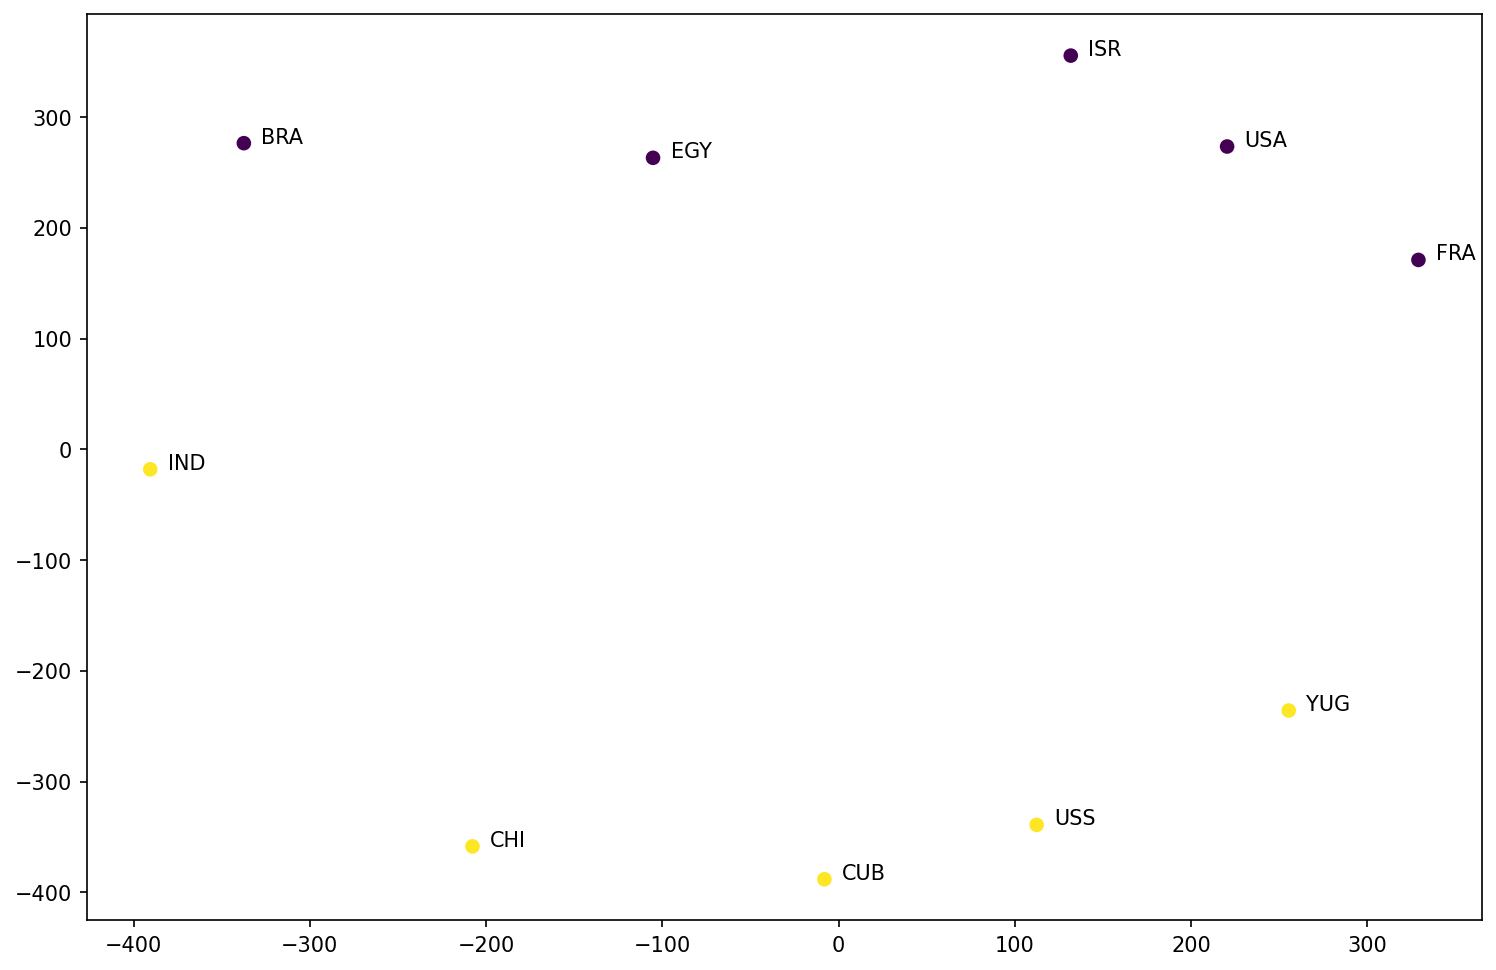

In [84]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize = (12, 8), dpi = 150)
ax.scatter(resultado[:,0], resultado[:,1], c = kmedoids.labels_)

for i, txt in enumerate(df_clean.index):
    ax.annotate(txt, (resultado[:,0][i] + 10, resultado[:,1][i]))

Adicionalmente vamos a probar este método utilizando datos sintéticos a través de la función `make_blobs`. A continuación vamos a crear 3 clusteres y vamos a probar K Medias y K Medoides para analizar si hay diferencias entre ellas.  

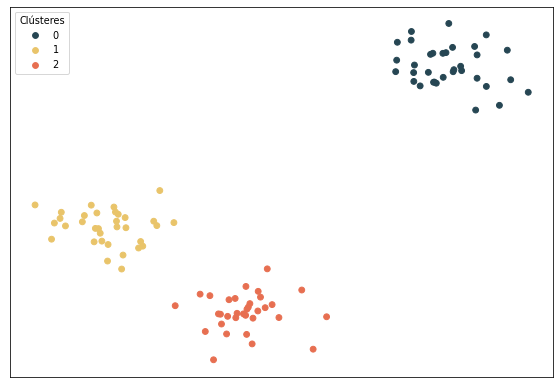

In [85]:
from sklearn import datasets

n_observaciones = 100
df = datasets.make_blobs(n_samples = n_observaciones, centers = 3, cluster_std = 1,
    random_state = 1)

# Colores de la gráfica
colores = ["#264653", "#e9c46a", "#e76f51"]
# diccionario = {0: colores[0], 1: colores[1], 2: colores[2], "vacio": colores[0]}
diccionario = {0: colores[0], 1: colores[1], 2: colores[2]}
clusteres = df[1]

# Visualicemos los datos
fig, ax = plt.subplots(figsize = (10, 7), dpi = 70)
ax.scatter(x = df[0][:,0], y = df[0][:,1], c = [diccionario[k] for k in clusteres])
ax.set_xticks([]);
ax.set_yticks([]);

# Creamos leyenda
markers = [plt.Line2D([0,0],[0,0], color = color, marker = 'o', linestyle = '') for color in diccionario.values()]
plt.legend(markers, diccionario.keys(), numpoints = 1, title = "Clústeres");

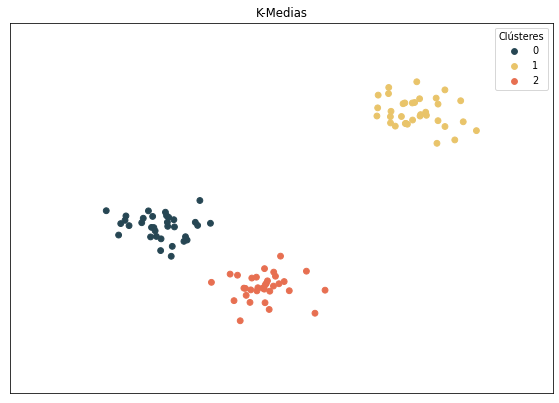

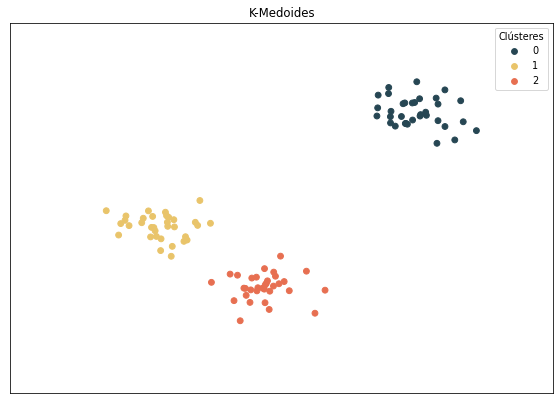

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X, y = df
# Normalizamos la base de datos para que todas nos queden en la misma escala
X = StandardScaler().fit_transform(X)

# Aplicamos K Medias
kmedias = KMeans(n_clusters = 3, random_state = 666).fit(X)

# Aplicamos K Medoides
kmedoids = KMedoids(n_clusters = 3, random_state = 666).fit(X)

metodologia = (('K-Medias', kmedias), ('K-Medoides', kmedoids))

for nombre, objeto in metodologia:
    y_pred = objeto.labels_.astype(int)
    color = [diccionario[k] for k in y_pred]

    fig, ax = plt.subplots(figsize = (10, 7), dpi = 70)
    ax.title.set_text(nombre)
    ax.scatter(X[:, 0], X[:, 1], c = color)
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    ax.set_xticks([])
    ax.set_yticks([])
    # Creamos leyenda
    markers = [plt.Line2D([0,0],[0,0], color = color, marker = 'o', linestyle = '') for color in diccionario.values()]
    plt.legend(markers, diccionario.keys(), numpoints = 1, title = "Clústeres");
    plt.show()

Como se puede evidenciar el resultado de ambos métodos es el mismo. En datos sin outliers, ambos métodos van a obtener resultados muy similares. Por ende, en este tipo de casos se prefiere usar K Medias pues es más eficiente.

Sin embargo, ahora analicemos un caso donde tenemos un conjunto de datos más complejo. Vamos a importar la base de dígitos con la que usualmente se entrenan algoritmos de reconocimiento de imagen. Estos datos corresponden a imágenes de 8x8 píxeles por lo que se alojan en arrays de la misma dimensión donde las entradas corresponden a un valor en la escala de grises.

Las imágenes de la muestra se ven de la siguiente manera:
<center>

![Digits](https://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png)

</center>

Para este caso vamos a usar Componentes principales para expresar estos datos a partir de dos variables. A continuación va a notar que tenemos 10 dígitos pero que en el espacio bidimensional no son linealmente separables los clústeres de forma correcta. No obstante, se trae este caso a colación para mostrar diferencias en el comportamiento entre K Medias y K Medoides. 

In [87]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

digits = load_digits()
data = scale(digits.data)
n_digits = len(np.unique(digits.target))
reduced_data = PCA(n_components = 2).fit_transform(data)


A continuación se ve el resultado de reducir a dos dimensiones los dígitos. Claramente no son fácilmente diferenciables los dígitos entre sí.

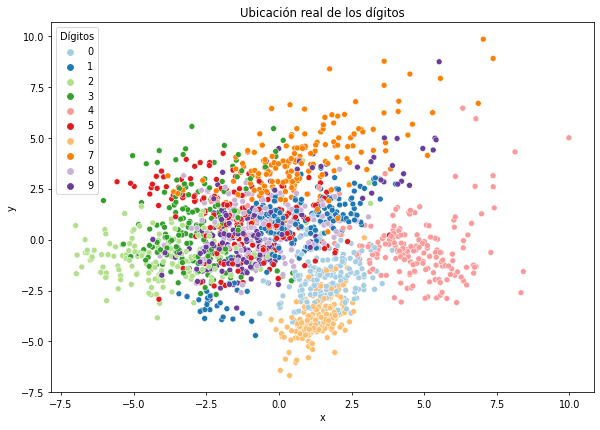

In [150]:
import seaborn as sns
# Creamos un df para visualizar los datos
digitos_plot = pd.DataFrame({"x": reduced_data[:,0], "y": reduced_data[:,1], 
    "Dígitos": digits.target})

# Visualicemos los datos
fig = plt.figure(figsize = (10, 7), dpi = 70)
plt.title("Ubicación real de los dígitos")
ax = sns.scatterplot(x = digitos_plot["x"], y = digitos_plot["y"],
    hue = digitos_plot["Dígitos"], palette = "Paired")

In [89]:
filtro = reduced_data[:,0] > 0
filtro2 = reduced_data[:,1] < 0
unique, counts = np.unique(digits.target[filtro & filtro2], return_counts = True)
dict(zip(unique, counts))

{0: 169, 1: 9, 2: 1, 3: 3, 4: 126, 5: 8, 6: 178, 8: 14, 9: 3}

Las áreas naranja, azul y rosada son las más limpias pues no se entrelazan tanto con los otros números y tienen menor varianza. Estas corresponden a los dígitos 0, 4 y 6. 

In [107]:
diccionario_color = {}
for k in range(0, 10):
    diccionario_color[k] = sns.color_palette("Paired", 10)[k]

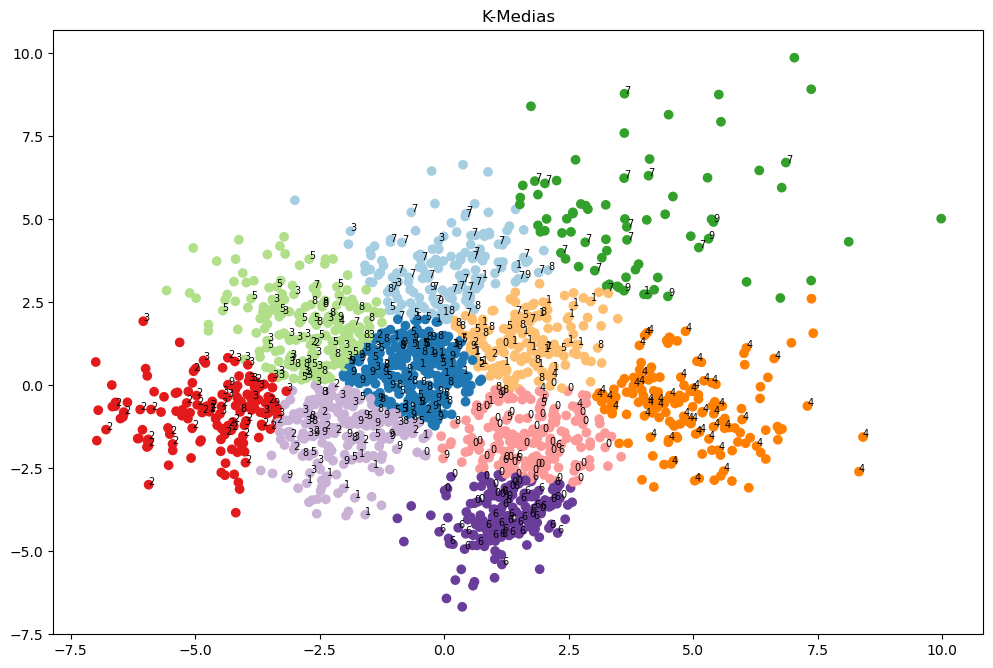

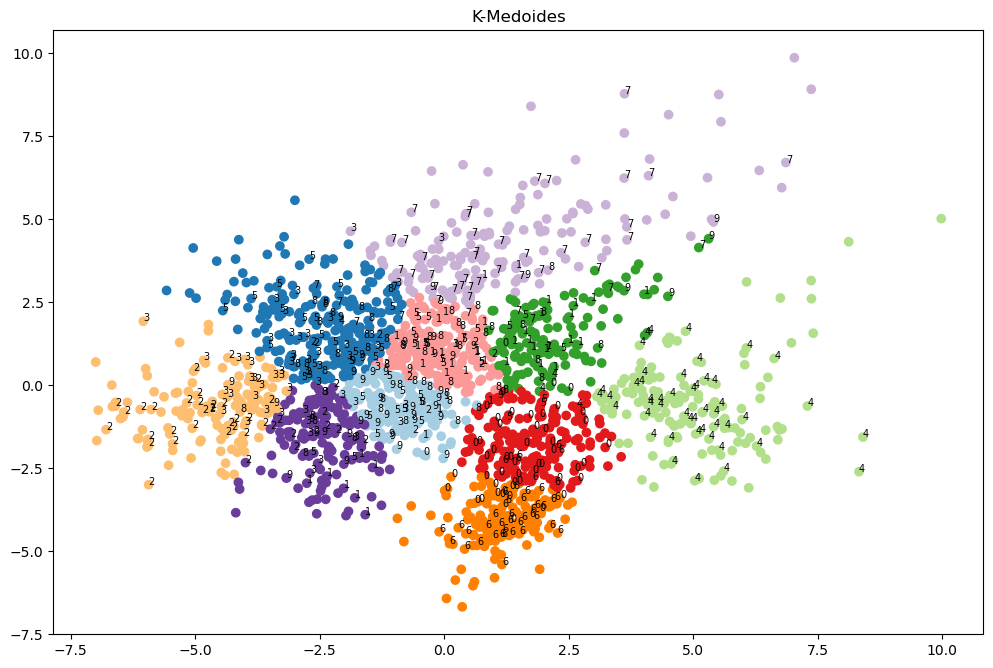

In [149]:
X = reduced_data
y = digits.target

# Aplicamos K Medias
kmedias = KMeans(n_clusters = 10, random_state = 666).fit(X)

# Aplicamos K Medoides
kmedoids = KMedoids(n_clusters = 10, random_state = 666).fit(X)

metodologia = (('K-Medias', kmedias), ('K-Medoides', kmedoids))

digitos_plot = pd.DataFrame({"X": X[:, 0], "Y": X[:, 1], "Dígito": y}).sample(n = 500, random_state = 666).reset_index(drop = True)
for nombre, objeto in metodologia:
    y_pred = objeto.labels_.astype(int)
    color = [sns.color_palette("Paired", 10)[k] for k in y_pred]

    fig, ax = plt.subplots(figsize = (12, 8), dpi = 100)
    ax.title.set_text(nombre)
    ax.scatter(X[:, 0], X[:, 1], c = color)
    for i, txt in enumerate(digitos_plot["Dígito"]):
        plt.text(digitos_plot["X"][i], digitos_plot["Y"][i], 
            digitos_plot["Dígito"][i], fontsize = 7)
    # ax.set_xticks([])
    # ax.set_yticks([])
    plt.show()

Note que ambos modelos logran clasificar mayoritariamente bien los dígitos 0, 4 y 6. No obstante existen ligeras diferencias en la agrupación de los puntos para ambos algoritmos. Por ejemplo, note que el dígito 4 está primordialmente concentrado en la esquina inferior derecha, pero que también tiene algunas entradas por encima de $7.5$ en el eje X y por encima de $2.0$ en el eje Y (esto lo puede comprobar en la imagen anterior llamada "Ubicación real de los dígitos" en el segmento de color rosado). Para este caso, el algoritmo de K Medias no clasifica correctamente los puntos más extremos, mientras que K Medoides es robusto a esos outliers y los reconoce dentro de la misma agrupación.

En general, se puede apreciar que los segmentos conformados por K Medoides son más alargados y me permiten mayor varianza que los de K Medias.

Ahora bien, estos algoritmos están diseñados para encontrar estructuras en los datos, por lo que los resultados muestran segmentos claramente definidos que parecieran tener más sentido que los datos iniciales. Sin embargo, es importante evidenciar que para algunos conjuntos de datos, por construcción, los algoritmos no se van a desempeñar satisfactoriamente.

**Referencias**
- Hastie, T., Friedman, J., &; Tisbshirani, R. (2017). The elements of Statistical Learning: Data Mining, Inference, and prediction. Springer. 
- Kaufman, L., &; Rousseeuw, P. J. (1990). Finding groups in data: An introduction to cluster analysis. Wiley. 